<a href="https://colab.research.google.com/github/robyvanzetta/NLP-Project/blob/main/Toxic_Comments_Classification_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toxic Comments Classification Dataset - Classification

Dataset is provided by [kaggle.com](https://www.kaggle.com)

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

## Description
The Toxic Comments Classification Dataset consists of a large number of Wikipedia comments which have been labeled by human raters for toxic behavior.

The dataset has been provided by the Conversation AI team, a research initiative founded by Jigsaw and Google (both a part of Alphabet) that are working on tools to help improve online conversation. One area of focus is the study of negative online behaviors, like toxic comments (i.e. comments that are rude, disrespectful or otherwise likely to make someone leave a discussion).

The dataset has been published as part of a Kaggle Challenge, which asked data scientists to build a multi-headed model that’s capable of detecting different types of of toxicity like threats, obscenity, insults, and identity-based hate better than AI Team’s current models.

In [22]:
# from google.colab import drive
# drive.mount('/content/drive')

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')


train = '/content/drive/MyDrive/Università/NLP/train.csv'
test = '/content/drive/MyDrive/Università/NLP/test.csv'
test_labels = '/content/drive/MyDrive/Università/NLP/test_labels.csv'
sample_submission = '/content/drive/MyDrive/Università/NLP/sample_submission.csv'

test_size = 0.25
random_state = 42

text = 'comment_text'
target = 'toxic'

In [24]:
df = pd.read_csv(train)
df_test = pd.read_csv(test)
df_test_labels = pd.read_csv(test_labels)
df_sample_submission = pd.read_csv(sample_submission)

In [25]:
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.head()

The dataset has 159571 rows and 8 columns


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [26]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [27]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [28]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


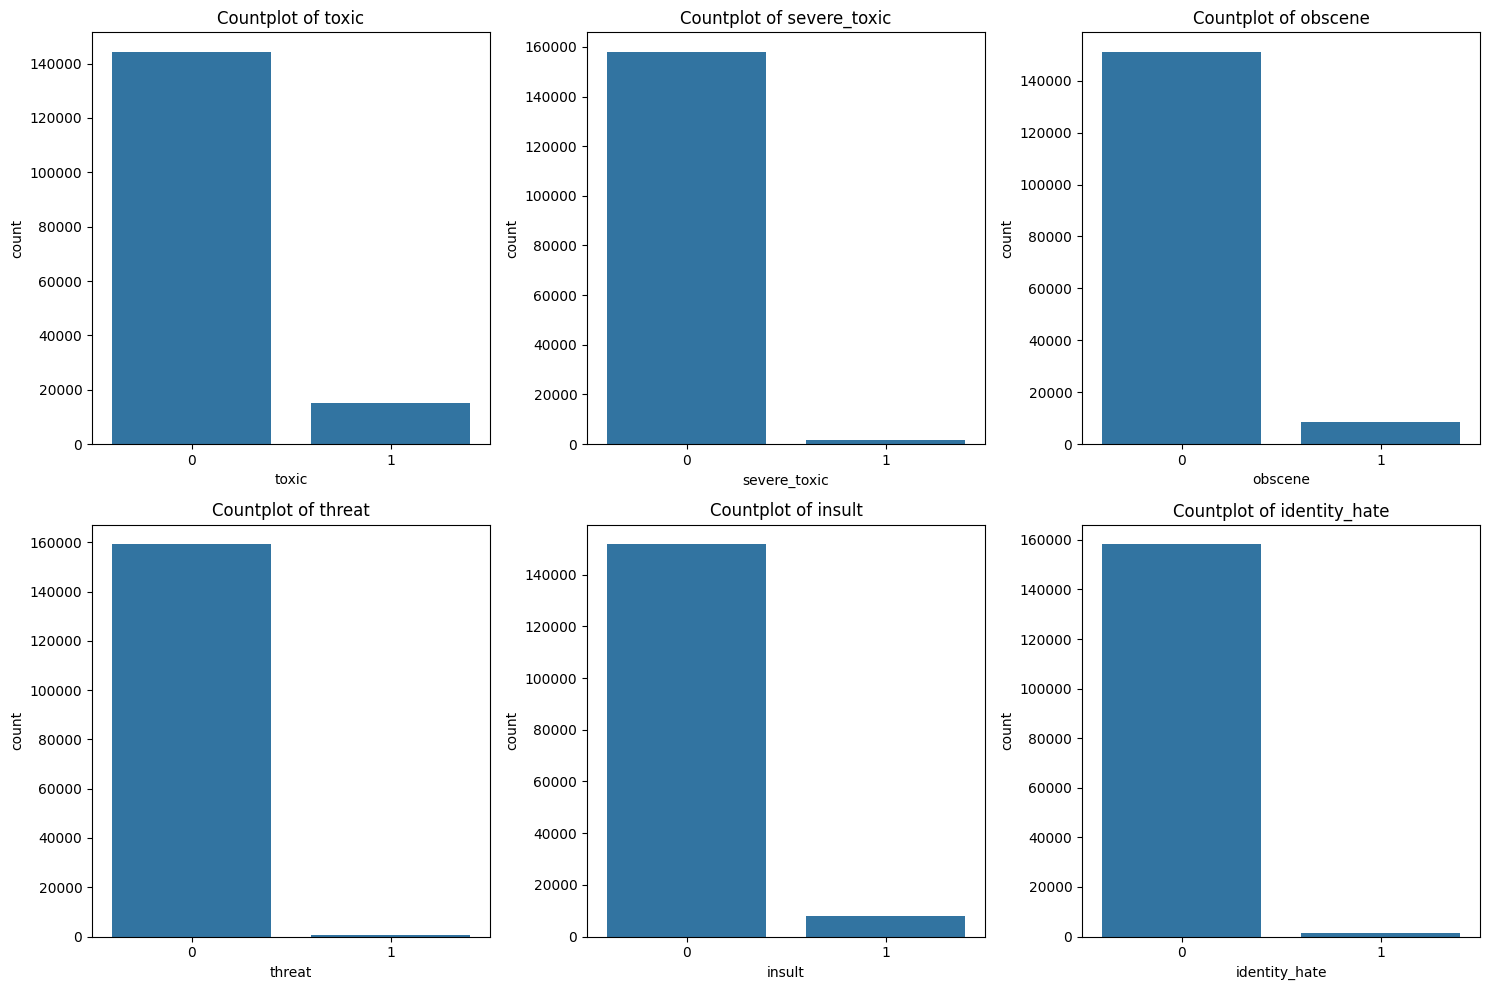

In [29]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

plt.figure(figsize=(15, 10))

for col in numerical_cols:
    plt.subplot(2, 3, df.select_dtypes(include=np.number).columns.get_loc(col) + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


## TF-IDF

In [30]:
# Import libraries for TF-IDF
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.utils.class_weight import compute_sample_weight

In [31]:
X = df[text]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(119678,) (119678,)
(39893,) (39893,)


In [32]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [33]:
# Define models (without class_weight)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
clf_configs = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Linear SVC': LinearSVC()
}

reports = {}
y_preds = {}

# Train each model using the sample weights
for name, clf in clf_configs.items():
    # Fit with sample weights if supported
    if name in ['Logistic Regression', 'Linear SVC']:
        clf.fit(X_train_tfidf, y_train, sample_weight=sample_weights)
    else:
        # MultinomialNB does not support sample_weight with sparse input directly in older versions
        clf.fit(X_train_tfidf, y_train)  # fallback, or use custom handling
    y_pred = clf.predict(X_test_tfidf)
    y_preds[name] = y_pred
    reports[name] = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Print classification reports
for name in clf_configs:
    print(f'=== {name} ===')
    print(classification_report(y_test, y_preds[name], zero_division=0))
    print('\n')

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     36078
           1       0.60      0.85      0.71      3815

    accuracy                           0.93     39893
   macro avg       0.79      0.90      0.83     39893
weighted avg       0.95      0.93      0.94     39893



=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     36078
           1       0.93      0.51      0.66      3815

    accuracy                           0.95     39893
   macro avg       0.94      0.75      0.81     39893
weighted avg       0.95      0.95      0.94     39893



=== Linear SVC ===
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     36078
           1       0.59      0.84      0.69      3815

    accuracy                           0.93     39893
   macro avg       0.79      0.89      0.83     39893
wei

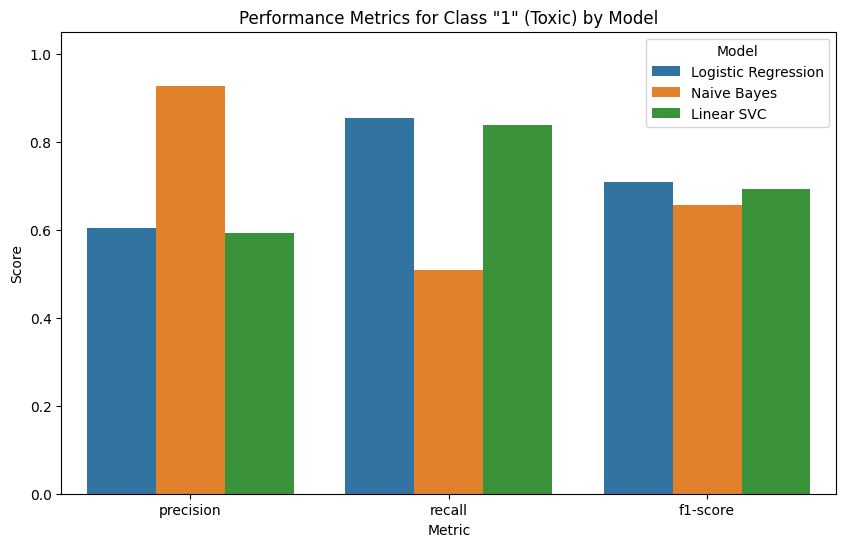

In [34]:
# Build a list of evaluation metrics for each model, excluding 'support'
data = []
for name, report in reports.items():
    for label, metrics in report.items():
        if label not in ['0', '1']:  # Only consider actual class labels (binary classification)
            continue
        for metric, score in metrics.items():
            if metric == 'support':  # Exclude 'support' (just a count, not a performance metric)
                continue
            data.append([name, label, metric, score])

# Create a DataFrame with metrics
df_metrics = pd.DataFrame(data, columns=['Model', 'Label', 'Metric', 'Score'])

# Filter to only include class "1" (toxic comments)
df_class1 = df_metrics[df_metrics['Label'] == '1']

# Plot the performance metrics (Precision, Recall, F1-score) for each model on class "1"
plt.figure(figsize=(10, 6))
sns.barplot(data=df_class1, x='Metric', y='Score', hue='Model', errorbar=None)
plt.title('Performance Metrics for Class "1" (Toxic) by Model')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.show()

## Neural Networks with LSTM

In [35]:
#Import libraries for Neural Networks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
# Reduce dataset to 20% for faster training (adjust as needed)
df_subset = df.sample(frac=0.01, random_state=42)

# Re-tokenize and reprocess this smaller dataset
X = df_subset[text]
y = df_subset[target]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_subset[text].values)
sequences = tokenizer.texts_to_sequences(df_subset[text].values)

In [38]:
def load_glove_embedding_matrix(word_index, embed_dim):
    """Load Glove embeddings.

    """
    !wget http://nlp.stanford.edu/data/glove.6B.zip
    !unzip glove*.zip

    path = 'glove.6B.100d.txt'

    embeddings_index = {}
    with open(path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    print('Found %s word vectors.' % len(embeddings_index))
    embedding_matrix = np.zeros((len(word_index) + 1, embed_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [39]:
USE_GLOVE=True
glove_matrix=None
if USE_GLOVE:
    embedding_dim = 100
    glove_matrix = load_glove_embedding_matrix(tokenizer.word_index, embedding_dim)

--2025-04-21 14:38:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-21 14:38:29--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-21 14:38:30--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.6’

gl

In [40]:

# Define a dictionary of models to train
models = {
    'LSTM': LSTM,
    'RNN': SimpleRNN,
    'GRU': GRU,
}

vocabulary_size = len(tokenizer.word_counts)
max_length = max(len(seq) for seq in sequences)

# Set hyperparameters
embed_dim = 100
hidden_units = 50  # Number of units in the recurrent layer

# Loop through each model type
for model_name, model_type in models.items():
    print(f'Training {model_name} model...')

    # Create the model
    model = Sequential()
    model.add(Embedding(vocabulary_size + 1, embed_dim, weights=[glove_matrix],
                        mask_zero=True, trainable=True, input_length=max_length))  # Use max_length here
    model.add(model_type(hidden_units, dropout=0.2, recurrent_dropout=0.2))  # Use the current model type
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Print model summary
    print(model.summary())

    # Train the model
    # (Add your training data and any callbacks like EarlyStopping here)
    # For example:
    # model.fit(X_train_padded, y_train_categorical, epochs=10, batch_size=64, validation_split=0.2)

    print(f'{model_name} model training complete.\n')

Training LSTM model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,248,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,248,500 (4.76 MB)

 Trainable params: 1,248,500 (4.76 MB)

 Non-trainable params: 0 (0.00 B)

None
LSTM model training complete.

Training RNN model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     1,248,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,248,500 (4.76 MB)

 Trainable params: 1,248,500 (4.76 MB)

 Non-trainable params: 0 (0.00 B)

None
RNN model training complete.

Training GRU model...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │     1,248,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,248,500 (4.76 MB)

 Trainable params: 1,248,500 (4.76 MB)

 Non-trainable params: 0 (0.00 B)

None
GRU model training complete.



In [41]:
# Filenames to save best weights per model
best_model_files = {
    'LSTM': 'lstm-conll-best-model.weights.h5',
    'RNN': 'rnn-conll-best-model.weights.h5',
    'GRU': 'gru-conll-best-model.weights.h5',
}

# Actual training loop with callbacks
for model_name, model_type in models.items():
    print(f'Training {model_name} model...')

    # Create the model
    model = Sequential()
    model.add(Embedding(vocabulary_size + 1, embed_dim, weights=[glove_matrix],
                        mask_zero=True, trainable=True, input_length=max_length))
    model.add(model_type(hidden_units, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Define callbacks
    checkpoint = ModelCheckpoint(
        filepath=best_model_files[model_name],
        save_weights_only=True,
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        verbose=1
    )

    early_stopping = EarlyStopping(
        monitor='val_loss',
        min_delta=0.01,
        patience=3,
        verbose=1,
        restore_best_weights=True
    )

    # Pad the sequences
    X_train_padded = pad_sequences(sequences, maxlen=max_length)  # Pad training sequences

    # One-hot encode the target variable
    from tensorflow.keras.utils import to_categorical #Import to_categorical
    y_train_categorical = to_categorical(df[target], num_classes=2)


    # Train the model
    model.fit(
        X_train_padded,                # your padded input sequences
        y_train_categorical,           # one-hot encoded labels
        epochs=20,
        batch_size=32,
        validation_split=0.2,
        callbacks=[checkpoint, early_stopping],
        verbose=2
    )

    print(f'{model_name} model training complete.\n')

Training LSTM model...
Epoch 1/20

Epoch 1: val_loss improved from inf to 0.34948, saving model to lstm-conll-best-model.weights.h5
40/40 - 119s - 3s/step - accuracy: 0.8699 - loss: 0.3866 - val_accuracy: 0.8906 - val_loss: 0.3495
Epoch 2/20

Epoch 2: val_loss did not improve from 0.34948
40/40 - 105s - 3s/step - accuracy: 0.8997 - loss: 0.3299 - val_accuracy: 0.8906 - val_loss: 0.3510
Epoch 3/20

Epoch 3: val_loss improved from 0.34948 to 0.34637, saving model to lstm-conll-best-model.weights.h5
40/40 - 157s - 4s/step - accuracy: 0.8997 - loss: 0.3180 - val_accuracy: 0.8906 - val_loss: 0.3464
Epoch 4/20

Epoch 4: val_loss did not improve from 0.34637
40/40 - 128s - 3s/step - accuracy: 0.8997 - loss: 0.3026 - val_accuracy: 0.8906 - val_loss: 0.3467
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
LSTM model training complete.

Training RNN model...
Epoch 1/20

Epoch 1: val_loss improved from inf to 0.40295, saving model to rnn-conll-best-model.weights.

In [ ]:
# Dictionary to store predictions and reports
predictions = {}
classification_report_nn = {}

# Loop through each model type for prediction and evaluation
for model_name, model_type in models.items():
    print(f'Evaluating {model_name} model...')

    # Tokenize and pad test data
    X_test_sequences = tokenizer.texts_to_sequences(X_test)
    X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length)

    # Predict
    predictions[model_name] = model.predict(X_test_padded)
    prediction_classes = np.argmax(predictions[model_name], axis=1)

    # One-hot encode true labels
    Y_test = to_categorical(y_test, num_classes=2)

    # Evaluate
    score, acc = model.evaluate(X_test_padded, Y_test, verbose=2, batch_size=32)
    print(f'{model_name} accuracy: {acc:.2f}')

    # Generate and store classification report
    report = classification_report(Y_test.argmax(axis=1), prediction_classes, output_dict=True)
    classification_reports_nn[model_name] = report

Evaluating LSTM model...
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 432s 346ms/step
1247/1247 - 428s - 344ms/step - accuracy: 0.7986 - loss: 0.5282
LSTM accuracy: 0.80
Evaluating RNN model...
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 423s 339ms/step
1247/1247 - 428s - 343ms/step - accuracy: 0.7986 - loss: 0.5282
RNN accuracy: 0.80
Evaluating GRU model...
 642/1247 ━━━━━━━━━━━━━━━━━━━━ 3:23 336ms/step

In [3]:
for model_name, report in classification_report_nn.items():
    print(f"\n=== Classification Report for {model_name} ===")
    df_report = pd.DataFrame(report).T
    print(df_report)

NameError: name 'classification_report_nn' is not defined